In [1]:
import pandas as pd
df=pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
df.shape

(12294, 7)

In [3]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [7]:

df['genre'] = df['genre'].fillna(df['genre'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='rating', data=df.head(10)) # Plotting the top 10 for clarity
plt.xticks(rotation=90)
plt.title('Rating of Anime by Name (Top 10)')
plt.xlabel('Anime Name')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

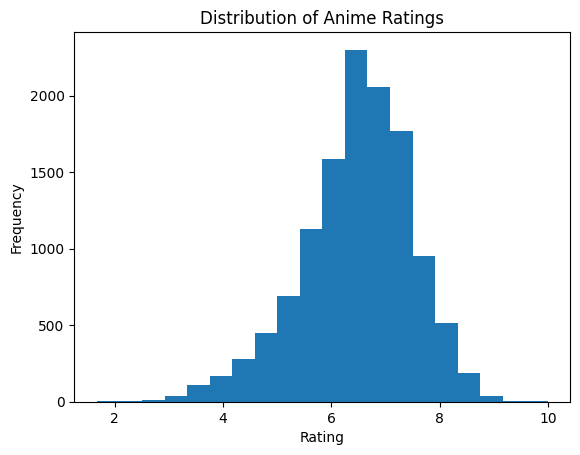

In [8]:

plt.hist(df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Ratings')
plt.show()

In [9]:
# Select relevant features
features = ['genre', 'rating']
# Convert categorical features into numerical representations
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
genre_matrix = vectorizer.fit_transform(df['genre'].fillna('')) # Fill missing values with empty string

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(genre_matrix)

In [11]:
# Design a function to recommend anime
import numpy as np

def recommend_anime(target_anime, num_recommendations):
    if target_anime not in df['name'].values:
        return f"Anime '{target_anime}' not found in the dataset."

    target_index = df[df['name'] == target_anime].index[0]
    similarity_scores = cosine_sim[target_index]
    top_indices = np.argsort(-similarity_scores)[:num_recommendations]
    return df.iloc[top_indices]['name'].tolist()



In [14]:
target_anime = input("Enter the name of the anime you want recommendations for: ")
num_recommendations = 10
recommendations = recommend_anime(target_anime, num_recommendations)

if isinstance(recommendations, list):
    print(f"Recommendations for '{target_anime}':")
    for anime in recommendations:
        print(f"- {anime}")
else:
 print(recommendations)

Enter the name of the anime you want recommendations for: Kimi no Na wa.
Recommendations for 'Kimi no Na wa.':
- Wind: A Breath of Heart (TV)
- Kimi no Na wa.
- Wind: A Breath of Heart OVA
- Aura: Maryuuin Kouga Saigo no Tatakai
- Harmonie
- Angel Beats!: Another Epilogue
- Shakugan no Shana
- Shakugan no Shana II (Second)
- Shakugan no Shana S
- Venus Versus Virus


In [15]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Evaluate the recommendation system
def evaluate_recommendation_system(test_df, num_recommendations):
    precision = 0
    recall = 0
    f1_score = 0
    for index, row in test_df.iterrows():
        target_anime = row['name']
        recommended_anime = recommend_anime(target_anime, num_recommendations)
        actual_anime = test_df[test_df['genre'] == row['genre']]['name'].tolist()

        precision += len(set(recommended_anime) & set(actual_anime)) / num_recommendations

        # Add a check to avoid division by zero for recall
        if len(actual_anime) > 0:
            recall += len(set(recommended_anime) & set(actual_anime)) / len(actual_anime)
        else:
            recall += 0 # Assign 0 recall if there are no actual relevant items

    precision /= len(test_df)
    recall /= len(test_df)

    # Add a check to avoid division by zero for f1_score
    if precision + recall > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0 # Assign 0 f1_score if both precision and recall are 0

    return precision, recall, f1_score

num_recommendations = 5
precision, recall, f1_score = evaluate_recommendation_system(test_df, num_recommendations)
print(f'Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1_score:.3f}')

Precision: 0.253, Recall: 0.525, F1-score: 0.341



#Interview Questions


- 1. Can you explain the difference between user-based and item-based collaborative filtering?

User-based collaborative filtering recommends items to a user based on the items preferred by similar users. Item-based collaborative filtering recommends items that are similar to the items a user has already liked.

- 2. What is collaborative filtering, and how does it work?


Collaborative filtering is a technique used in recommendation systems to predict a user's preferences based on the behavior or preferences of other users. It works by identifying patterns in user behavior and recommending items that are likely to be of interest to a user based on their past behavior and the behavior of similar users.